In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()
print(len(X_train),len(X_test))

60000 10000


In [35]:
X_train[0].shape

(28, 28)

4

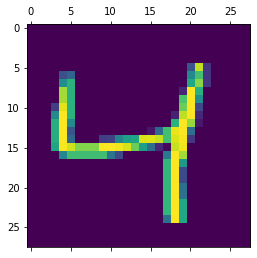

In [36]:
plt.matshow(X_train[2])
y_train[2]

In [37]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [38]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.fit(X_train_flattened,y_train,epochs =5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 1s 486us/step - loss: 0.4675 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 1s 480us/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 470us/step - loss: 0.2838 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 458us/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
313/313 [==============================] - 0s 374us/step - loss: 0.2679 - accuracy: 0.9256


[0.26790180802345276, 0.925599992275238]

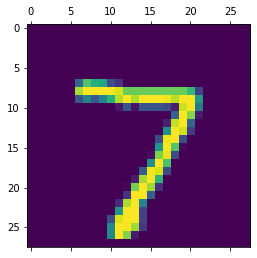

In [44]:
plt.matshow(X_test[0]);

In [47]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

7

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print("Predicted = {} and true values = {}".format(y_predicted_labels[:5],y_test[:5]))

Predicted = [7, 2, 1, 0, 4] and true values = [7 2 1 0 4]


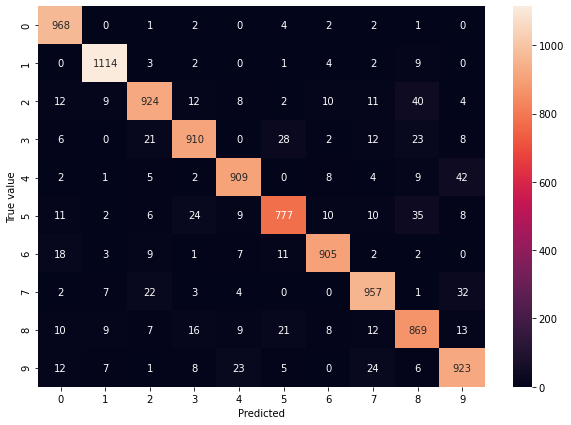

In [57]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True value');

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(500, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.fit(X_train,y_train,epochs =5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1988 - accuracy: 0.9421
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0805 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9883
Epoch 5/5
313/313 [==============================] - 0s 595us/step - loss: 0.0649 - accuracy: 0.9806


[0.0648718997836113, 0.9805999994277954]

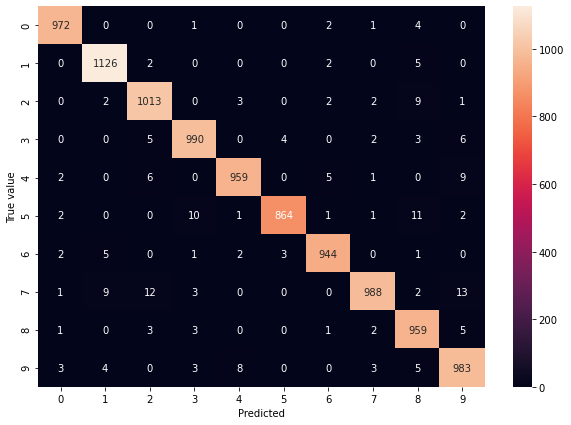

In [61]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True value');